In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.rcParams['figure.figsize'] = [16, 8]
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("Starwars.csv")

In [3]:
df.head(20)

,Unnamed: 0,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,1,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,Tatooine,Human
1,2,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,NaN,Tatooine,Droid
2,3,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,NaN,Naboo,Droid
3,4,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,Tatooine,Human
4,5,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,Alderaan,Human
5,6,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.0,male,Tatooine,Human
6,7,Beru Whitesun lars,165.0,75.0,brown,light,blue,47.0,female,Tatooine,Human
7,8,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
8,9,Biggs Darklighter,183.0,84.0,black,light,brown,24.0,male,Tatooine,Human
9,10,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57.0,male,Stewjon,Human


In [4]:
df_starwars = df

In [5]:
df_starwars = df_starwars.loc[df_starwars["mass"] < 1e3] # filter mass < 1e3

In [6]:
df_starwars = df_starwars.filter(items=["height", "mass"]) # filter height & mass cols.

In [7]:
df_starwars.head(20)

,height,mass
0,172.0,77.0
1,167.0,75.0
2,96.0,32.0
3,202.0,136.0
4,150.0,49.0
5,178.0,120.0
6,165.0,75.0
7,97.0,32.0
8,183.0,84.0
9,182.0,77.0


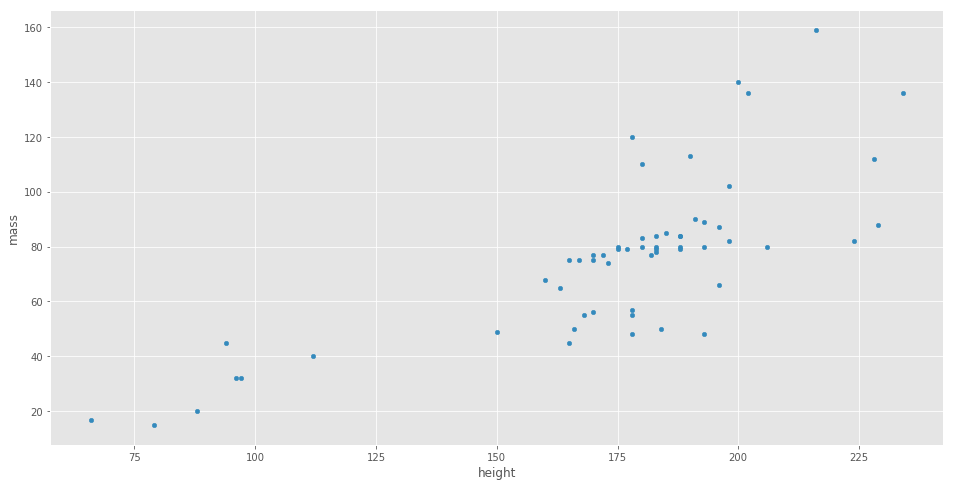

In [8]:
df_starwars.plot(x="height", y="mass", kind="scatter" );

In [9]:
X_data = df_starwars["height"].values.reshape(-1,1)
y_data = df_starwars["mass"].values.reshape(-1,1)

In [10]:
lin_reg = LinearRegression().fit(X_data, y_data)

In [11]:
print(lin_reg.intercept_) # intercept
print(lin_reg.coef_) # slope

[-32.54075816]
[[0.62135989]]


In [12]:
y_predicted = lin_reg.predict(X_data)

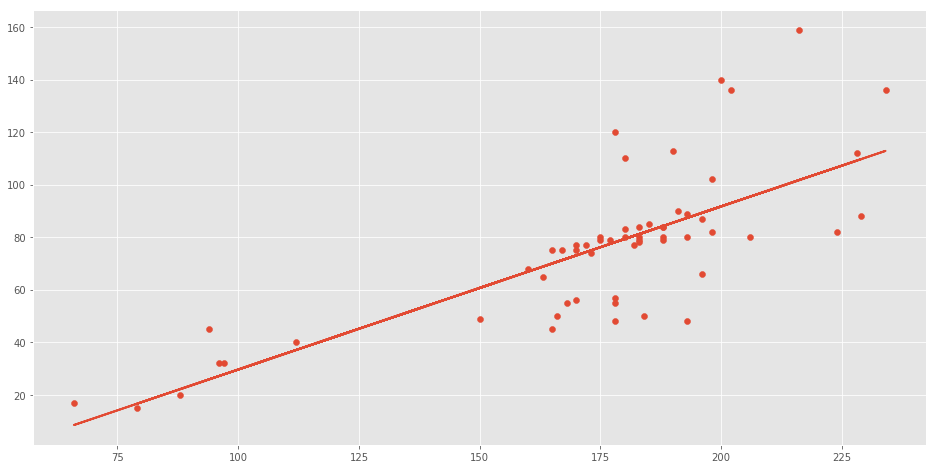

In [13]:
plt.scatter(X_data, y_data);
plt.plot(X_data, y_predicted, linewidth=2);

Probabilistic Programming approach for LR

In [14]:
with pm.Model() as linReg :
    intercept = pm.Normal("intercept", mu= 0, sd=20)
    slope = pm.Normal("slope", mu= 1, sd=2)
    sd = pm.Uniform("sd", 0,100)
    mu = pm.Deterministic("mu", intercept + slope * X_data)
    y = pm.Normal("y", mu=mu, sd=sd, observed = y_data)
    trace = pm.sample(10000, tune=2000, cores = 6)
# 10000 steps, throw away the 1st 2e3 steps (burn-in period)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, slope, intercept]
Sampling 6 chains: 100%|██████████| 72000/72000 [01:18<00:00, 922.74draws/s] 
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


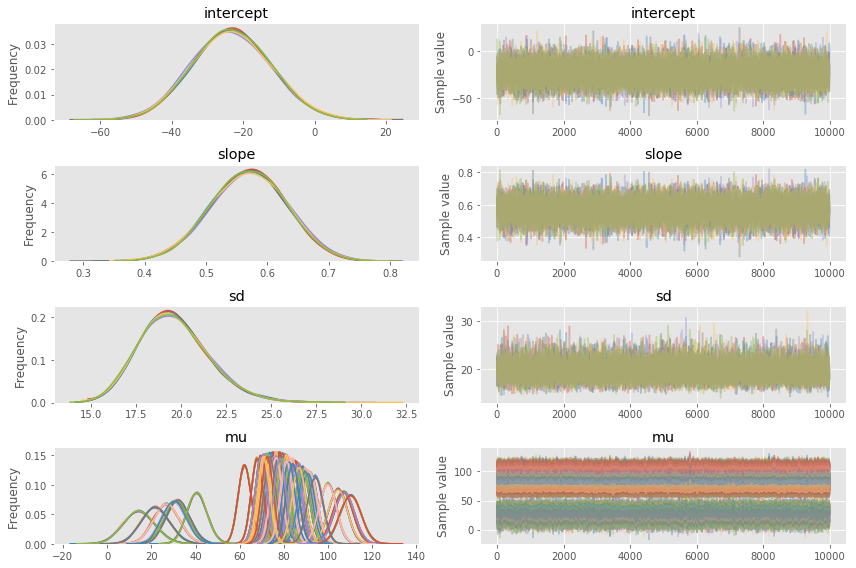

In [15]:
pm.traceplot(trace, varnames=["intercept", "slope", "sd", "mu"]);

In [19]:
intercept = trace["intercept"].mean() # mean intercepr
slope = trace["slope"].mean() # mean slope
print(intercept)
print(slope)

-23.135198749806545
0.5694118447641217


In [20]:
intercept_std = trace["intercept"].std() # std intercepr
slope_std = trace["slope"].std() # std slope
print(intercept_std)
print(slope_std)

10.86856993193275
0.06168897025711797


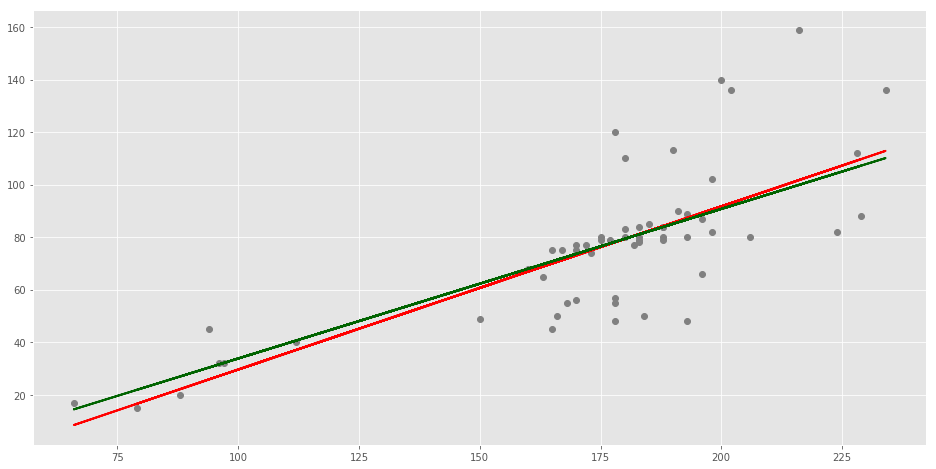

In [21]:
plt.plot(X_data, y_data, "o", color = "gray")
plt.plot(X_data, y_predicted, "-", color='red', linewidth=2)
plt.plot(X_data, intercept + slope * X_data, "-",color = "darkgreen", linewidth=2)

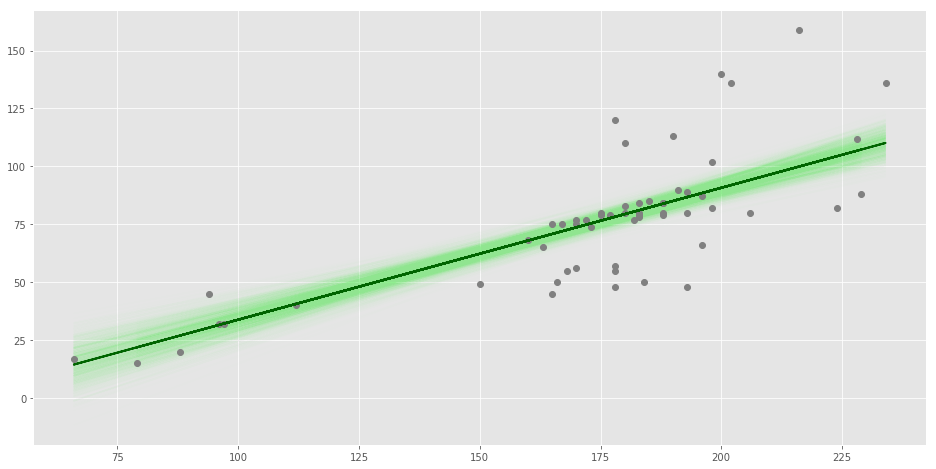

In [24]:
for i in range(0,10000,10): 
    plt.plot(X_data, 
             trace["intercept"][i] + trace["slope"][i]*X_data, 
             c="lightgreen", alpha=0.003);
plt.plot(X_data, y_data, "o", color = "grey");
plt.plot(X_data, intercept + slope * X_data, "-", color = "darkgreen", linewidth=2);